### Import Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np

reviews_data = pd.read_excel("reviews_Preprocessing.xlsx", usecols=["Label", "Stemming"])
pd.set_option('display.max_colwidth', None)
reviews_data.columns = ["label", "reviews"]
reviews_data

,label,reviews
0,1,"['kemeja', 'bagus', 'banget', 'nang kenapa', 'beli', 'kemeja', 'toko', 'kemeja', 'asli', 'bagus', 'bahan', 'adem', 'gerah', 'nerawang', 'camera', 'jelek', 'kemeja', 'asli', 'bagus', 'banget', 'bohong', 'sumpah']"
1,0,"['jahit', 'rapi cuman', 'benang', 'jahit', 'jelek']"
2,0,"['sesuai', 'harga', 'tipis', 'oke', 'warna', 'abu', 'di foto', 'biru', 'dikit', 'thanks', 'sellerr']"
3,1,"['gila', 'bagus', 'worth', 'it', 'lembut', 'baju', 'kirain', 'tipis', 'kemeja', 'kaos', 'baju', 'bagus', 'banget', 'dah', 'harga', 'segitu', 'worth', 'it', 'thankyou', 'ya', 'next', 'order']"
4,0,"['kain', 'bagus', 'halus', 'buka', 'kotor', 'ya', 'warna', 'putih']"
...,...,...
826,1,"['terima', 'kasih', 'barang', 'sesuai', 'ukur', 'seesuai', 'gambar', 'bagus', 'terima', 'kasih', 'ya']"
827,1,"['mantapp', 'realpicttt', 'bangttt', 'emas', 'cuman', 'plastik', 'aja', 'pakai', 'kardus', 'nda', 'papa', 'bagus', 'banget']"
828,1,"['suka', 'banget', 'tas', 'tas', 'local', 'keren', 'parah', 'pokoknyaaaaa', 'suka', 'banget', 'tas', 'tas', 'local', 'keren', 'parah', 'pokoknyaaaaa', 'suka', 'banget', 'tas', 'tas', 'local', 'keren', 'parah', 'pokoknyaaaaa', 'suka', 'banget', 'tas', 'tas', 'local', 'keren', 'parah', 'pokoknyaaaaa', 'suka', 'banget', 'tas', 'kakak']"
829,1,"['kualitas', 'produk', 'produk', 'original', 'harga', 'produk']"


In [2]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
reviews_data["reviews"] = reviews_data["reviews"].apply(join_text_list)
reviews_data

,label,reviews
0,1,kemeja bagus banget nang kenapa beli kemeja toko kemeja asli bagus bahan adem gerah nerawang camera jelek kemeja asli bagus banget bohong sumpah
1,0,jahit rapi cuman benang jahit jelek
2,0,sesuai harga tipis oke warna abu di foto biru dikit thanks sellerr
3,1,gila bagus worth it lembut baju kirain tipis kemeja kaos baju bagus banget dah harga segitu worth it thankyou ya next order
4,0,kain bagus halus buka kotor ya warna putih
...,...,...
826,1,terima kasih barang sesuai ukur seesuai gambar bagus terima kasih ya
827,1,mantapp realpicttt bangttt emas cuman plastik aja pakai kardus nda papa bagus banget
828,1,suka banget tas tas local keren parah pokoknyaaaaa suka banget tas tas local keren parah pokoknyaaaaa suka banget tas tas local keren parah pokoknyaaaaa suka banget tas tas local keren parah pokoknyaaaaa suka banget tas kakak
829,1,kualitas produk produk original harga produk


In [3]:
label = reviews_data["label"]
text = reviews_data["reviews"]

### Pembagian Data

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(text, label, test_size=0.2, random_state=42)

positive_count_train = (train_labels == 1).sum()
negative_count_train = (train_labels == 0).sum()
total_count_train = len(train_labels)

# Mencetak jumlah data positif dan negatif pada data uji
print("Jumlah data latih positif :", positive_count_train)
print("Jumlah data latih negatif :", negative_count_train)

positive_count_test = (test_labels == 1).sum()
negative_count_test = (test_labels == 0).sum()
total_count_test = len(test_labels)

# Mencetak jumlah data positif dan negatif pada data uji
print("Jumlah data uji positif :", positive_count_test)
print("Jumlah data uji negatif :", negative_count_test)

total_count = positive_count_train + negative_count_train + positive_count_test + negative_count_test
print("Jumlah data             :", total_count)

Jumlah data latih positif : 302
Jumlah data latih negatif : 362
Jumlah data uji positif : 83
Jumlah data uji negatif : 84
Jumlah data             : 831


### Ekstraksi Fitur TF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Create CountVectorizer
cvect = CountVectorizer()
TF_vector_train = cvect.fit_transform(train_data)

# Convert TF vector to dataframe
TF_df_train = pd.DataFrame(TF_vector_train.toarray(), columns=cvect.get_feature_names_out())

# Display the dataframes
print("TF vector train:")
TF_df_train

TF vector train:


,aaa,aaaa,aaaaaa,aamiin,abal,abang,abis,abu,acara,ad,...,yeaaayyyyy,yen,yha,ynag,yng,you,youtube,youu,yung,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Perhitungan TF vector pada test set menggunakan CountVectorizer yang sudah dilatih pada train set
TF_vector_test = cvect.transform(test_data)

# Convert TF vector to dataframe
TF_df_test = pd.DataFrame(TF_vector_test.toarray(), columns=cvect.get_feature_names_out())

print("TF vector Test:")
TF_df_test

TF vector Test:


,aaa,aaaa,aaaaaa,aamiin,abal,abang,abis,abu,acara,ad,...,yeaaayyyyy,yen,yha,ynag,yng,you,youtube,youu,yung,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Seleksi Fitur Chi Square

In [7]:
from sklearn.feature_selection import SelectPercentile, chi2

# Percentage of features to select (30%)
percent = 30

# Calculate the number of desired features based on the percentage
k = int(percent / 100 * TF_vector_train.shape[1])

# Apply feature selection with chi-square on the train set
selector = SelectPercentile(chi2, percentile=percent)
tf_mat_train_selected = selector.fit_transform(TF_vector_train, train_labels)

# Apply the same feature selection on the test set
tf_mat_test_selected = selector.transform(TF_vector_test)

# Get selected feature names
selected_feature_names = [feature_name for feature_name, selected in zip(cvect.get_feature_names_out(), selector.get_support()) if selected]

# Create dataframes for selected features
tf_df_train_selected = pd.DataFrame(tf_mat_train_selected.toarray(), columns=selected_feature_names)
tf_df_test_selected = pd.DataFrame(tf_mat_test_selected.toarray(), columns=selected_feature_names)

# Display the dataframes
print("Selected Features in Train Set:")
tf_df_train_selected

Selected Features in Train Set:


,aaa,aaaa,aaaaaa,aamiin,abal,abang,abu,ada,adasaya,adem,...,vidio,warna,wktu,worth,wrap,xl,ya,yah,yng,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
660,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print("\nSelected Features in Test Set:")
tf_df_test_selected


Selected Features in Test Set:


,aaa,aaaa,aaaaaa,aamiin,abal,abang,abu,ada,adasaya,adem,...,vidio,warna,wktu,worth,wrap,xl,ya,yah,yng,you
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perbandingan Label Asli dengan Label Prediksi pada Data Testing

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Create the Multinomial Naive Bayes model with appropriate class_prior
model = MultinomialNB()

# Train the model using the selected training data
model.fit(tf_mat_train_selected, train_labels)

# Perform predictions on the selected test data
predictions = model.predict(tf_mat_test_selected)

# Create a dataframe with testing data, true labels, and predicted labels
results_df = pd.DataFrame({'Data Testing': tf_df_test_selected.index, 'Label Asli': test_labels, 'Label Prediksi': predictions})

# Display the dataframe
results_df


,Data Testing,Label Asli,Label Prediksi
610,0,0,0
818,1,1,1
290,2,0,0
559,3,0,0
168,4,1,1
...,...,...,...
192,162,1,1
650,163,0,0
456,164,0,0
773,165,1,1


### Visualisasi Hasil Klasifikasi

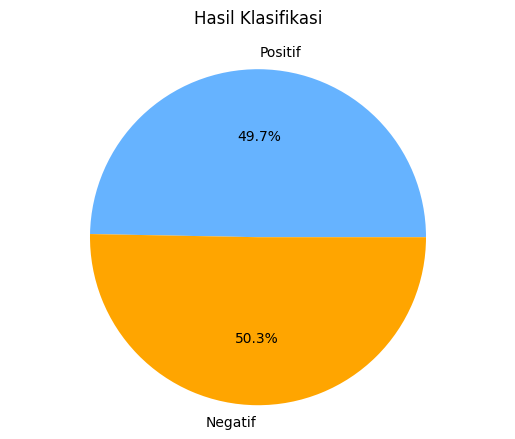

In [10]:
import matplotlib.pyplot as plt
# Data untuk visualisasi
labels = ['Positif', 'Negatif']
sizes = [positive_count_test, negative_count_test]
colors = ['#66B3FF', '#FFA500']  # Warna biru dan oranye

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Hasil Klasifikasi\n')

# Menampilkan plot
plt.axis('equal')
plt.show()

### Confusion Matrix 

Akurasi  : 0.9161676646706587
Precision: 0.9367088607594937
Recall   : 0.891566265060241
F1-score : 0.9135802469135801


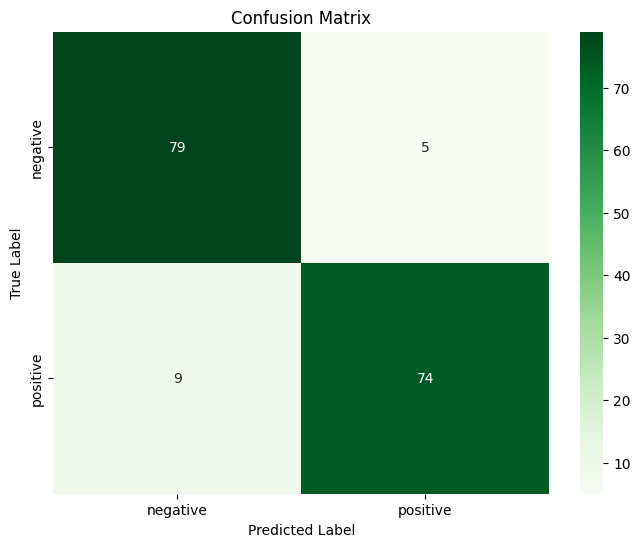

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sn

# Menghitung akurasi
accuracy = accuracy_score(test_labels, predictions)
print("Akurasi  :", accuracy)

# Menghitung precision
precision = precision_score(test_labels, predictions)
print("Precision:", precision)

# Menghitung recall
recall = recall_score(test_labels, predictions)
print("Recall   :", recall)

# Menghitung F1-score
f1 = f1_score(test_labels, predictions)
print("F1-score :", f1)

# Generate confusion matrix
columns = ['negative', 'positive']
confm = confusion_matrix(test_labels, predictions)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

# Create heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Menyimpan hasil modeling

In [12]:
import joblib

# Menyimpan model
joblib.dump(model, 'multinomial_nb_10 percent_model.pkl')

['multinomial_nb_10 percent_model.pkl']